In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
dictionary = pd.read_csv('/content/drive/MyDrive/ML portfolio/Hamoye/premier presentation/dictionary.csv')
summer = pd.read_csv('/content/drive/MyDrive/ML portfolio/Hamoye/premier presentation/summer.csv')
winter = pd.read_csv('/content/drive/MyDrive/ML portfolio/Hamoye/premier presentation/winter.csv')

In [59]:

dictionary.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [5]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


# Data cleaning
## Summer Data


In [6]:
# Checking for duplicate values in Summer data

summer['Discipline'] = summer['Discipline'].str.lower()
discipline = summer['Discipline'].unique()
discipline.sort()
discipline

array(['archery', 'artistic g.', 'athletics', 'badminton', 'baseball',
       'basketball', 'basque pelota', 'beach volley.', 'beach volleyball',
       'bmx', 'boxing', 'canoe / kayak f', 'canoe / kayak s',
       'canoe slalom', 'canoe sprint', 'cricket', 'croquet',
       'cycling bmx', 'cycling road', 'cycling track', 'diving',
       'dressage', 'eventing', 'fencing', 'figure skating', 'football',
       'golf', 'gymnastics artistic', 'gymnastics rhythmic', 'handball',
       'hockey', 'ice hockey', 'jeu de paume', 'judo', 'jumping',
       'lacrosse', 'marathon swimming', 'modern pentath.',
       'modern pentathlon', 'mountain bike', 'polo', 'rackets',
       'rhythmic g.', 'roque', 'rowing', 'rugby', 'sailing', 'shooting',
       'softball', 'swimming', 'synchronized s.', 'synchronized swimming',
       'table tennis', 'taekwondo', 'tennis', 'trampoline', 'triathlon',
       'tug of war', 'vaulting', 'volleyball', 'water motorspor',
       'water polo', 'weightlifting', 'wrestl

In [7]:
#Replacing duplicates in Discipline Column
summer = summer.replace('beach volley.', 'beach volleyball')
summer = summer.replace('bmx', 'cycling bmx')
summer = summer.replace('artistic g.', 'gymnastics artistic')
summer = summer.replace('rhythmic g.', 'gymnastics rhythmic')
summer = summer.replace('modern pentath.', 'modern pentathlon')
summer = summer.replace('synchronized s.', 'synchronized swimming')
summer = summer.replace('wrestling free.', 'wrestling freestyle')
summer = summer.replace('wrestling gre-r', 'wrestling greco roman')

In [8]:
#Removing ',' in the Athlete Column
summer["Athlete"]=summer["Athlete"].str.split(', ').str[::-1].str.join(' ')
summer["Athlete"]=summer["Athlete"].str.title()

# Exploratory Data Analysis

In [9]:
print('There are {} Discipline during summer (1896-2012)'.format(summer['Discipline'].nunique()))

There are 59 Discipline during summer (1896-2012)


### The 1896 Summer Olympics, officially known as the Games of the Olympiad, was an international multi-sport event which was celebrated in Athens, Greece, from 6 to 15 April 1896. It was the first Olympic Games held in the Modern era. About 100,000 people attended for the opening of the games.
### 1916 Olympics – cancelled due to World War I
### 1940 and 1944 Olympics – cancelled due to World War II

In [10]:

summer['Year'].unique() 

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [11]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [12]:
# 147 Countries, 22 Cities participated in summer Olympic game (1896-2012)
# 2 Gender, 43 Sport, 59 Discipline, 666 Event, 3 medals (GOLD, SILVER, BRONZE) and 22759 unique Athlete
summer.describe(include=['O'])

,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165,31165,31165,31165,31161,31165,31165,31165
unique,22,43,59,22759,147,2,666,3
top,London,Aquatics,athletics,Michael Phelps,USA,Men,Football,Gold
freq,3567,4170,3638,22,4585,22746,1497,10486


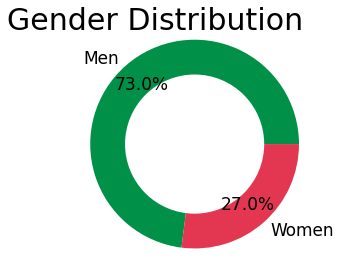

In [13]:
gender_counts =summer["Gender"].value_counts().reset_index(name= "Counts")[:10]

#To get the percentage
gender_counts['Percentage %'] = round(gender_counts.Counts / gender_counts.Counts.sum() * 100, 2)


gender_percentage = gender_counts["Percentage %"].to_list()
plt.title('Gender Distribution', fontsize=30, loc='Right')
plt.pie(gender_percentage, colors=['#009047','#E23651'], labels= ["Men", "Women"], radius=1.2, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000000"}, explode= [0.00, 0.00])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [14]:
# TOp 10 men athlete with the highest medal
athlete_medal = summer.groupby(['Athlete','Country','Discipline','Sport'])['Medal'].count().reset_index().sort_values(
    by="Medal",ascending=False)[:10]
athlete_medal

,Athlete,Country,Discipline,Sport,Medal
15103,Michael Phelps,USA,swimming,Aquatics,22
12871,Larisa Latynina,URS,gymnastics artistic,Gymnastics,18
16111,Nikolay Andrianov,URS,gymnastics artistic,Gymnastics,15
5114,Edoardo Mangiarotti,ITA,fencing,Fencing,13
20238,Takashi Ono,JPN,gymnastics artistic,Gymnastics,13
2724,Boris Shakhlin,URS,gymnastics artistic,Gymnastics,13
15796,Natalie Coughlin,USA,swimming,Aquatics,12
10550,Jenny Thompson,USA,swimming,Aquatics,12
783,Alexei Nemov,RUS,gymnastics artistic,Gymnastics,12
16713,Paavo Nurmi,FIN,athletics,Athletics,12


Text(0.5, 1.0, 'Top 10 Athlete with most Olympic medals')

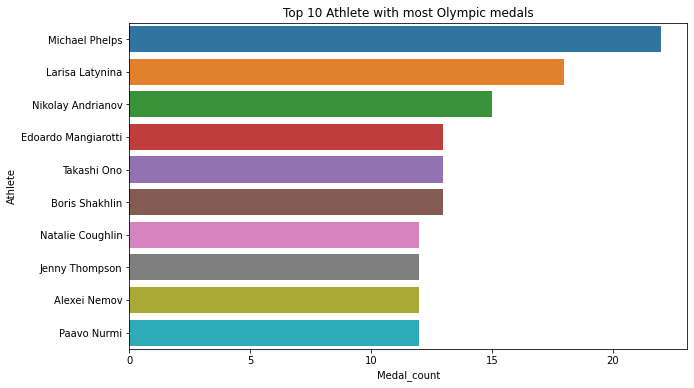

In [15]:
#Top 10 Athletes with the Most medal
plt.figure(figsize=(10,6))
sns.barplot(x = athlete_medal["Medal"], y = athlete_medal['Athlete'])

plt.xlabel("Medal_count")
plt.ylabel("Athlete")
plt.title("Top 10 Athlete with most Olympic medals")

In [16]:
# Highest Medal (Gold) achieved
medals_athlete = summer.groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
medals_athlete = medals_athlete.pivot('Athlete','Medal','Sport').fillna(0)
gold_top_athletes=medals_athlete.sort_values(by="Gold",ascending=False)[:11]
gold_top_athletes

Medal,Bronze,Gold,Silver
Athlete,,,
Michael Phelps,2.0,18.0,2.0
Larisa Latynina,4.0,9.0,5.0
Mark Spitz,1.0,9.0,1.0
Paavo Nurmi,0.0,9.0,3.0
Carl Lewis,0.0,9.0,1.0
Sawao Kato,1.0,8.0,3.0
Jenny Thompson,1.0,8.0,3.0
Birgit Fischer,0.0,8.0,4.0
Ray Ewry,0.0,8.0,0.0


In [17]:
# Highest Medal (Silver) achieved
silver_top_athletes=medals_athlete.sort_values(by="Silver",ascending=False)[:11]
silver_top_athletes

Medal,Bronze,Gold,Silver
Athlete,,,
Shirley Farber Babashoff,0.0,2.0,6.0
Aleksandr Dityatin,1.0,3.0,6.0
Mikhail Voronin,1.0,2.0,6.0
Mariya Gorokhovskaya,0.0,2.0,5.0
Viktor Lisitsky,0.0,0.0,5.0
Leisel Jones,1.0,3.0,5.0
Yuri Titov,3.0,1.0,5.0
Gustavo Marzi,0.0,2.0,5.0
Katalin Kovacs,0.0,3.0,5.0


In [18]:
# Highest Medal (Bronze) achieved
bronze_top_athletes=medals_athlete.sort_values(by="Bronze",ascending=False)[:11]
bronze_top_athletes

Medal,Bronze,Gold,Silver
Athlete,,,
Heikki Savolainen,6.0,2.0,1.0
Alexei Nemov,6.0,4.0,2.0
Merlene Ottey-Page,6.0,0.0,3.0
Franziska Van Almsick,6.0,0.0,4.0
Antje Buschschulte,5.0,0.0,0.0
Philip Edwards,5.0,0.0,0.0
Daniel Revenu,5.0,1.0,0.0
Natalie Coughlin,5.0,3.0,4.0
Adrianus Egbertus Willem De Jong,5.0,0.0,0.0


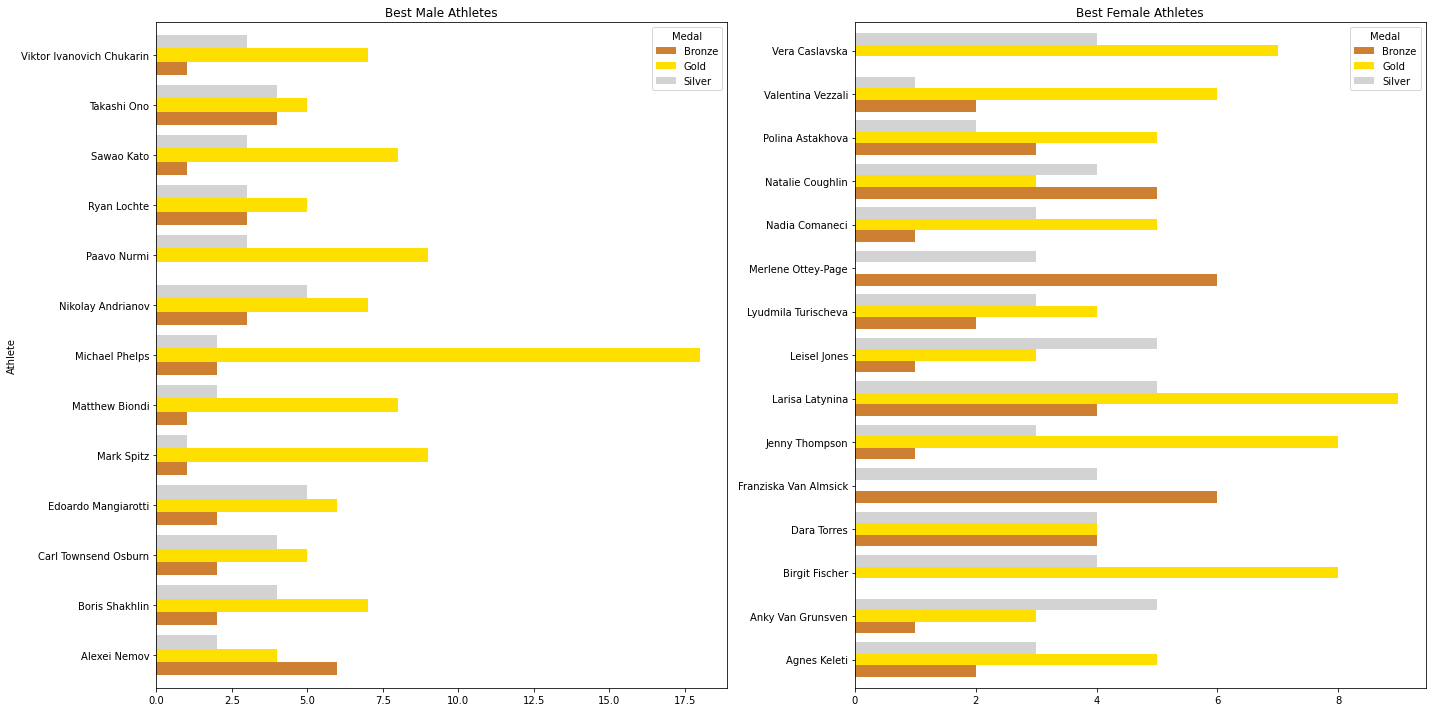

In [19]:
# Female and male with the 
fig,ax=plt.subplots(1,2,figsize=(20,10))
men=summer[summer["Gender"]=="Men"]
men=men.groupby(["Athlete","Medal"])["Country"].count().reset_index().sort_values(by="Country",ascending=False)
men=men[men["Athlete"].isin(summer["Athlete"].value_counts().index[:20])]
men=men.pivot("Athlete","Medal","Country")
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')
plt.tight_layout()

women=summer[summer["Gender"]=="Women"]
women=women.groupby(["Athlete","Medal"])["Country"].count().reset_index().sort_values(by="Country",ascending=False)
women=women[women["Athlete"].isin(summer["Athlete"].value_counts().index[:45])]
women=women.pivot("Athlete","Medal","Country")
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title("Best Female Athletes")
ax[1].set_ylabel("")
plt.tight_layout()

In [20]:
# top 10 female with highest medal
female_athlete_medal = summer[summer['Gender'] == 'Women'].groupby(
    ['Athlete','Country','Discipline','Sport'])['Medal'].count().reset_index().sort_values(
    by="Medal",ascending=False)[:10]
female_athlete_medal

,Athlete,Country,Discipline,Sport,Medal
3008,Larisa Latynina,URS,gymnastics artistic,Gymnastics,18
1078,Dara Torres,USA,swimming,Aquatics,12
4123,Natalie Coughlin,USA,swimming,Aquatics,12
2430,Jenny Thompson,USA,swimming,Aquatics,12
5484,Vera Caslavska,TCH,gymnastics artistic,Gymnastics,11
4506,Polina Astakhova,URS,gymnastics artistic,Gymnastics,10
1664,Franziska Van Almsick,GER,swimming,Aquatics,10
29,Agnes Keleti,HUN,gymnastics artistic,Gymnastics,10
3830,Merlene Ottey-Page,JAM,athletics,Athletics,9
311,Anky Van Grunsven,NED,dressage,Equestrian,9


In [21]:
# Highest Medal (Gold) achieved by Female
female_gold_medals = summer[summer['Gender'] == 'Women'].groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
female_gold_medals = female_gold_medals.pivot('Athlete','Medal','Sport').fillna(0)
female_g_ath=female_gold_medals.sort_values(by="Gold",ascending=False)[:11]
female_g_ath

Medal,Bronze,Gold,Silver
Athlete,,,
Larisa Latynina,4.0,9.0,5.0
Birgit Fischer,0.0,8.0,4.0
Jenny Thompson,1.0,8.0,3.0
Vera Caslavska,0.0,7.0,4.0
Amy Van Dyken,0.0,6.0,0.0
Valentina Vezzali,2.0,6.0,1.0
Kristin Otto,0.0,6.0,0.0
Nadia Comaneci,1.0,5.0,3.0
Elisabeta Lipa,1.0,5.0,2.0


In [22]:
# Highest Medal (bronze) achieved by Female
female_bronze_medals = summer[summer['Gender'] == 'Women'].groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
female_bronze_medals = female_bronze_medals.pivot('Athlete','Medal','Sport').fillna(0)
female_b_ath=female_bronze_medals.sort_values(by="Bronze",ascending=False)[:11]
female_b_ath

Medal,Bronze,Gold,Silver
Athlete,,,
Franziska Van Almsick,6.0,0.0,4.0
Merlene Ottey-Page,6.0,0.0,3.0
Natalie Coughlin,5.0,3.0,4.0
Antje Buschschulte,5.0,0.0,0.0
Sofiya Muratova,4.0,2.0,2.0
Margit Korondi,4.0,2.0,2.0
Larisa Latynina,4.0,9.0,5.0
Dara Torres,4.0,4.0,4.0
Tanya Harding,3.0,0.0,1.0


In [23]:
# Highest Medal (silver) achieved by Female
female_silver_medals = summer[summer['Gender'] == 'Women'].groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
female_silver_medals = female_silver_medals.pivot('Athlete','Medal','Sport').fillna(0)
female_s_ath=female_silver_medals.sort_values(by="Silver",ascending=False)[:11]
female_s_ath

Medal,Bronze,Gold,Silver
Athlete,,,
Shirley Farber Babashoff,0.0,2.0,6.0
Dagmar Hase,1.0,1.0,5.0
Mariya Gorokhovskaya,0.0,2.0,5.0
Katalin Kovacs,0.0,3.0,5.0
Leisel Jones,1.0,3.0,5.0
Anky Van Grunsven,1.0,3.0,5.0
Larisa Latynina,4.0,9.0,5.0
Susan O'Neill,2.0,2.0,4.0
Natalie Coughlin,5.0,3.0,4.0


Text(0.5, 1.0, 'Medals Distribution of Top Countries for Summer Olympics')

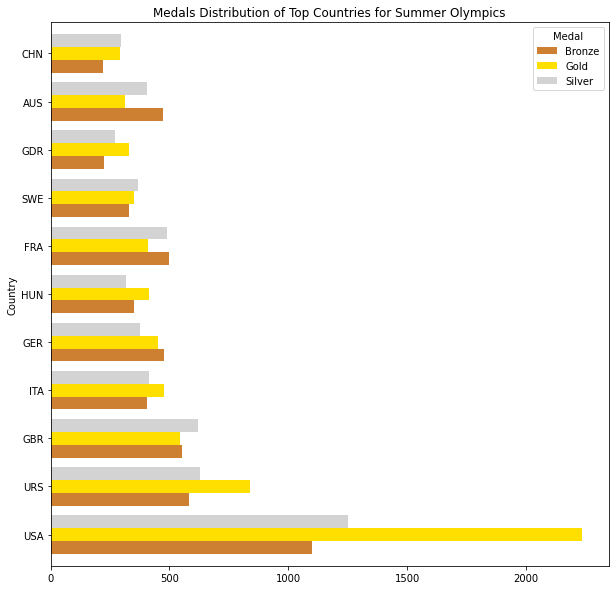

In [24]:
# medal by country
medals = summer.groupby(['Country','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
medals = medals.pivot('Country','Medal','Sport').fillna(0)

top_medal_country=medals.sort_values(by="Gold",ascending=False)[:11]
top_medal_country.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Medals Distribution of Top Countries for Summer Olympics")

### Over the years  men got always more medals than women but in the last years starting from 1980 there as been more inclusion of the women in the summer olympics.

In [29]:


# female
female_participants = summer[(summer["Gender"] == "Women")][["Gender", "Year"]]
female_participants = female_participants.groupby('Year').count().reset_index()

#male
male_participants = summer[(summer["Gender"] == "Men")][["Gender", "Year"]]
male_participants = male_participants.groupby('Year').count().reset_index()

Text(0.5, 1.0, 'Female & Male Participation over the Years (Summer Olympic)')

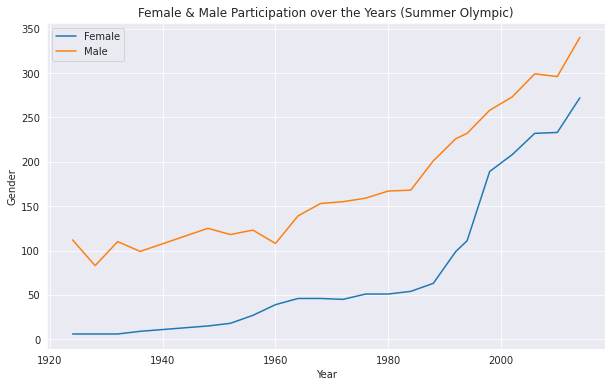

In [53]:
sns.set_style('darkgrid')
# matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,6))
sns.lineplot(data=female_participants, x='Year', y='Gender',  palette = 'blue', label = 'Female')
sns.lineplot(data=male_participants, x='Year', y='Gender',  palette = 'orange', label = 'Male')

plt.title("Female & Male Participation over the Years (Summer Olympic)")


## Winter

### Data Cleaning

In [32]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


### On January 25, 1924, the first Winter Olympics take off in style at Chamonix in the French Alps.
### Spectators were thrilled by the ski jump and bobsled as well as 12 other events involving a total of six sports.
### The 1994 Winter Olympics, held in Lillehammer, Norway, were the first Winter Games to be held in a different year from the Summer Games.
#### This change resulted from the decision reached in the 91st IOC Session (1986) to separate the Summer and Winter Games and place them in alternating even-numbered years.

In [33]:

winter['Year'].unique()

array([1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972,
       1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014])

In [34]:
#Removing ',' in the Athlete Column
winter["Athlete"]=winter["Athlete"].str.split(', ').str[::-1].str.join(' ')
winter["Athlete"]=winter["Athlete"].str.title()

# Exploratory Data Analysis

In [35]:
print('There are {} Discipline during summer (1924-2014)'.format(winter['Discipline'].nunique()))

There are 15 Discipline during summer (1924-2014)


In [36]:
# 45 Countries, 19 Cities participated in winter Olympic game (1896-2012)
# 2 Gender, 7 Sport, 15 Discipline, 83 Event, 3 medals (GOLD, SILVER, BRONZE) and 22759 unique Athlete

winter.describe(include=['O'])

,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,5770,5770,5770,5770,5770,5770,5770,5770
unique,19,7,15,3758,45,2,83,3
top,Sochi,Skiing,Ice Hockey,Ole Einar Bjoerndalen,USA,Men,Ice Hockey,Silver
freq,612,1781,1536,13,653,3944,1536,1930


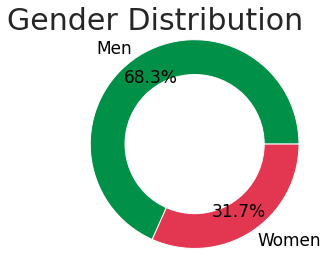

In [37]:
gender_counts =winter["Gender"].value_counts().reset_index(name= "Counts")[:10]

#To get the percentage
gender_counts['Percentage %'] = round(gender_counts.Counts / gender_counts.Counts.sum() * 100, 2)


gender_percentage = gender_counts["Percentage %"].to_list()
plt.title('Gender Distribution', fontsize=30, loc='Right')
plt.pie(gender_percentage, colors=['#009047','#E23651'], labels= ["Men", "Women"], radius=1.2, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000000"}, explode= [0.00, 0.00])

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


In [38]:
# TOp 10 men athlete with the highest medal
athlete_medal = winter.groupby(['Athlete','Country','Discipline','Sport'])['Medal'].count().reset_index().sort_values(
    by="Medal",ascending=False)[:10]
athlete_medal

,Athlete,Country,Discipline,Sport,Medal
2643,Ole Einar Bjoerndalen,NOR,Biathlon,Biathlon,13
441,Björn Daehlie,NOR,Cross Country Skiing,Skiing,12
3235,Stefania Belmondo,ITA,Cross Country Skiing,Skiing,10
2274,Marit Bjoergen,NOR,Cross Country Skiing,Skiing,9
624,Claudia Pechstein,GER,Speed skating,Skating,9
2867,Raisa Smetanina,URS,Cross Country Skiing,Skiing,9
3209,Sixten Jernberg,SWE,Cross Country Skiing,Skiing,9
3514,Uschi Disl,GER,Biathlon,Biathlon,9
1993,Kjetil Andre Aamodt,NOR,Alpine Skiing,Skiing,8
1208,Gunda Niemann-Stirnemann,GER,Speed skating,Skating,8


Text(0.5, 1.0, 'Top 10 Athlete with most Olympic medals')

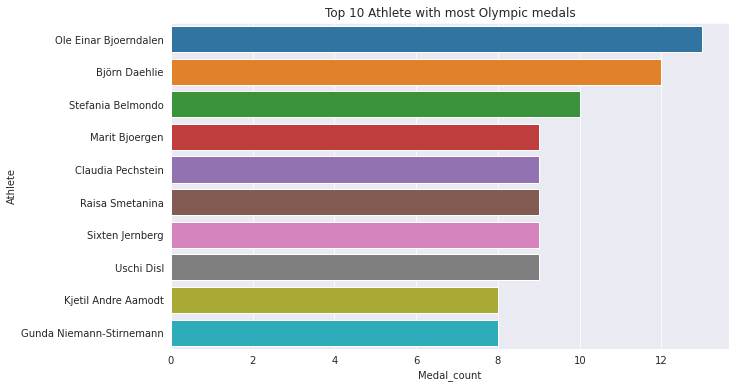

In [39]:
#Top 10 Athletes with the Most medal
plt.figure(figsize=(10,6))
sns.barplot(x = athlete_medal["Medal"], y = athlete_medal['Athlete'])

plt.xlabel("Medal_count")
plt.ylabel("Athlete")
plt.title("Top 10 Athlete with most Olympic medals")

In [40]:
# Highest Medal (Gold) achieved
medals_athlete = winter.groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
medals_athlete = medals_athlete.pivot('Athlete','Medal','Sport').fillna(0)
gold_top_athletes=medals_athlete.sort_values(by="Gold",ascending=False)[:11]
gold_top_athletes

Medal,Bronze,Gold,Silver
Athlete,,,
Björn Daehlie,0.0,8.0,4.0
Ole Einar Bjoerndalen,1.0,8.0,4.0
Ljubov Egorova,0.0,6.0,3.0
Marit Bjoergen,1.0,6.0,2.0
Lidiya Skoblikova,0.0,6.0,0.0
Claudia Pechstein,2.0,5.0,2.0
Clas Thunberg,1.0,5.0,1.0
Larissa Lazutina,1.0,5.0,1.0
Bonnie Blair,1.0,5.0,0.0


In [41]:
# Ole Einar Bjoerndalen has 8 gold representing NOR(Nagano, Salt Lake City,Vancouver,Sochi) - Sport: Biathlon
winter[(winter['Athlete'] == 'Ole Einar Bjoerndalen')&(winter['Medal'] == 'Gold')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
3171,1998,Nagano,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,10KM,Gold
3618,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,10KM,Gold
3624,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,12.5Km Pursuit,Gold
3630,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,20KM,Gold
3637,2002,Salt Lake City,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,4X7.5KM Relay,Gold
4666,2010,Vancouver,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,4X7.5KM Relay,Gold
5160,2014,Sochi,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,10KM,Gold
5186,2014,Sochi,Biathlon,Biathlon,Ole Einar Bjoerndalen,NOR,Men,Relay Mix,Gold


In [42]:
# Björn Daehlie also had 8 gold representing NOR(Nagano, Albertville andNagano) - Sport : Skiing
winter[(winter['Athlete'] == 'Björn Daehlie')&(winter['Medal'] == 'Gold')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
2759,1992,Albertville,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,4X10KM Relay,Gold
2780,1992,Albertville,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,50KM,Gold
2786,1992,Albertville,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,Combined 10KM + 15KM Pursuit,Gold
3081,1994,Lillehammer,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,10KM Pursuit,Gold
3123,1994,Lillehammer,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,Combined 10KM + 15KM Pursuit,Gold
3513,1998,Nagano,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,10KM Pursuit,Gold
3529,1998,Nagano,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,4X10KM Relay,Gold
3549,1998,Nagano,Skiing,Cross Country Skiing,Björn Daehlie,NOR,Men,50KM,Gold


In [43]:
# Highest Medal (Bronze) achieved
medals_athlete = winter.groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
medals_athlete = medals_athlete.pivot('Athlete','Medal','Sport').fillna(0)
gold_top_athletes=medals_athlete.sort_values(by="Bronze",ascending=False)[:11]
gold_top_athletes

Medal,Bronze,Gold,Silver
Athlete,,,
Harri Kirvesniemi,6.0,0.0,0.0
Stefania Belmondo,5.0,2.0,3.0
Arianna Fontana,4.0,0.0,1.0
Apolo Anton Ohno,4.0,2.0,2.0
Elena Vaelbe,4.0,3.0,0.0
Anja Paerson,4.0,1.0,1.0
Marja-Liisa Kirvesniemi,4.0,3.0,0.0
Mika Myllylae,4.0,1.0,1.0
Roald Larsen,4.0,0.0,2.0


In [44]:
# Highest Medal (Silver) achieved
medals_athlete = winter.groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
medals_athlete = medals_athlete.pivot('Athlete','Medal','Sport').fillna(0)
gold_top_athletes = medals_athlete.sort_values(by="Silver",ascending=False)[:11]
gold_top_athletes

Medal,Bronze,Gold,Silver
Athlete,,,
Raisa Smetanina,1.0,4.0,5.0
Bogdan Musiol,1.0,1.0,5.0
Andrea Ehrig,1.0,1.0,5.0
Björn Daehlie,0.0,8.0,4.0
Ivica Kostelic,0.0,0.0,4.0
Katerina Neumannova,1.0,1.0,4.0
Uschi Disl,3.0,2.0,4.0
Ho-Suk Lee,0.0,1.0,4.0
Hilkka Riihivuori,0.0,0.0,4.0


In [45]:
# top 10 female with highest medal
female_athlete_medal = winter[winter['Gender'] == 'Women'].groupby(
    ['Athlete','Country','Discipline','Sport'])['Medal'].count().reset_index().sort_values(
    by="Medal",ascending=False)[:10]
female_athlete_medal

,Athlete,Country,Discipline,Sport,Medal
941,Stefania Belmondo,ITA,Cross Country Skiing,Skiing,10
204,Claudia Pechstein,GER,Speed skating,Skating,9
857,Raisa Smetanina,URS,Cross Country Skiing,Skiing,9
1021,Uschi Disl,GER,Biathlon,Biathlon,9
699,Marit Bjoergen,NOR,Cross Country Skiing,Skiing,9
358,Gunda Niemann-Stirnemann,GER,Speed skating,Skating,8
501,Karin Kania,GDR,Speed skating,Skating,8
338,Galina Kulakova,URS,Cross Country Skiing,Skiing,8
519,Kati Wilhelm,GER,Biathlon,Biathlon,7
649,Manuela Di Centa,ITA,Cross Country Skiing,Skiing,7


In [46]:
# Highest Medal (Gold) achieved by Female
female_gold_medals = winter[winter['Gender'] == 'Women'].groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
female_gold_medals = female_gold_medals.pivot('Athlete','Medal','Sport').fillna(0)
female_g_ath=female_gold_medals.sort_values(by="Gold",ascending=False)[:11]
female_g_ath

Medal,Bronze,Gold,Silver
Athlete,,,
Marit Bjoergen,1.0,6.0,2.0
Lidiya Skoblikova,0.0,6.0,0.0
Ljubov Egorova,0.0,6.0,3.0
Claudia Pechstein,2.0,5.0,2.0
Larissa Lazutina,1.0,5.0,1.0
Bonnie Blair,1.0,5.0,0.0
Raisa Smetanina,1.0,4.0,5.0
Lee-Kyung Chun,1.0,4.0,0.0
Hayley Wickenheiser,0.0,4.0,1.0


In [47]:
# Highest Medal (Silver) achieved by Female
female_gold_medals = winter[winter['Gender'] == 'Women'].groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
female_gold_medals = female_gold_medals.pivot('Athlete','Medal','Sport').fillna(0)
female_g_ath=female_gold_medals.sort_values(by="Silver",ascending=False)[:11]
female_g_ath

Medal,Bronze,Gold,Silver
Athlete,,,
Raisa Smetanina,1.0,4.0,5.0
Andrea Ehrig,1.0,1.0,5.0
Gunda Niemann-Stirnemann,1.0,3.0,4.0
Karin Kania,1.0,3.0,4.0
Katerina Neumannova,1.0,1.0,4.0
Uschi Disl,3.0,2.0,4.0
Yang Yang (S),1.0,0.0,4.0
Hilkka Riihivuori,0.0,0.0,4.0
Kristina Groves,1.0,0.0,3.0


In [48]:
# Highest Medal (Bronze) achieved by Female
female_gold_medals = winter[winter['Gender'] == 'Women'].groupby(['Athlete','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
female_gold_medals = female_gold_medals.pivot('Athlete','Medal','Sport').fillna(0)
female_g_ath=female_gold_medals.sort_values(by="Bronze",ascending=False)[:11]
female_g_ath

Medal,Bronze,Gold,Silver
Athlete,,,
Stefania Belmondo,5.0,2.0,3.0
Arianna Fontana,4.0,0.0,1.0
Anja Paerson,4.0,1.0,1.0
Gabriella Paruzzi,4.0,1.0,0.0
Marja-Liisa Kirvesniemi,4.0,3.0,0.0
Elena Vaelbe,4.0,3.0,0.0
Uschi Disl,3.0,2.0,4.0
Gabi Zange,3.0,0.0,0.0
Alevtina Kolchina,3.0,1.0,1.0


Text(0.5, 1.0, 'Medals Distribution of Top Countries for Summer Olympics')

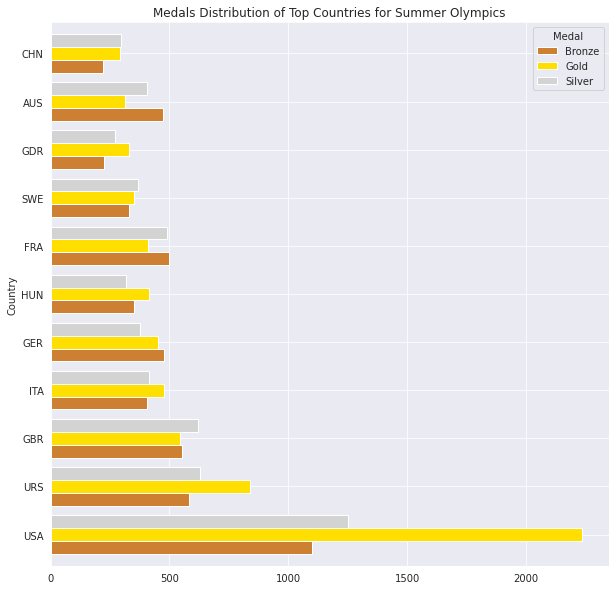

In [49]:
# medal by country
medals = summer.groupby(['Country','Medal'])["Sport"].count().reset_index().sort_values(by='Sport',ascending=False)
medals = medals.pivot('Country','Medal','Sport').fillna(0)

top_medal_country=medals.sort_values(by="Gold",ascending=False)[:11]
top_medal_country.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Medals Distribution of Top Countries for Summer Olympics")

### From 1952 there have been an increase in female paricipation in winter olympics

In [50]:


# female
female_participants = winter[(winter["Gender"] == "Women")][["Gender", "Year"]]
female_participants = female_participants.groupby('Year').count().reset_index()

#male
male_participants = winter[(winter["Gender"] == "Men")][["Gender", "Year"]]
male_participants = male_participants.groupby('Year').count().reset_index()

Text(0.5, 1.0, 'Female & Male Participation over the Years (Winter Olympic)')

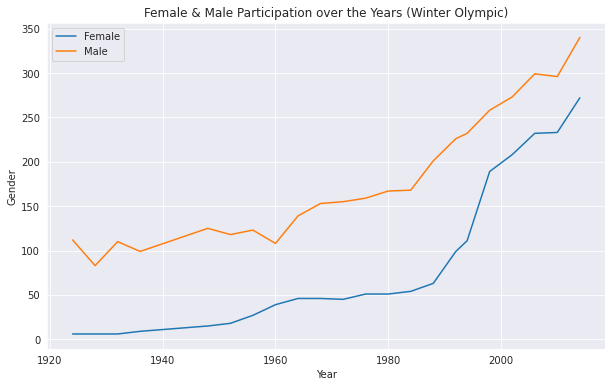

In [52]:
sns.set_style('darkgrid')
# matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,6))
sns.lineplot(data=female_participants, x='Year', y='Gender',  palette = 'blue', label = 'Female')
sns.lineplot(data=male_participants, x='Year', y='Gender',  palette = 'orange', label = 'Male')

plt.title("Female & Male Participation over the Years (Winter Olympic)")
